In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [30]:
def load_data(file_name):
    current_directory = os.getcwd()
    parent_directory = os.path.abspath(os.path.join(current_directory, '..'))
    file_path = os.path.join(parent_directory, file_name)
    dataset = pd.read_csv(file_path)
    return dataset

In [31]:
dataset = load_data('climate_change.csv')

In [32]:
dataset.head(10)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
5,1983,10,0.002,340.30,1663.79,303.970,195.171,359.174,1366.0589,0.0569,0.093
6,1983,11,-0.176,341.53,1658.23,304.032,195.921,360.758,1366.1072,0.0524,0.232
7,1983,12,-0.176,343.07,1654.31,304.082,196.609,362.174,1366.0607,0.0486,0.078
8,1984,1,-0.339,344.05,1658.98,304.130,197.219,363.359,1365.4261,0.0451,0.089
9,1984,2,-0.565,344.77,1656.48,304.194,197.759,364.296,1365.6618,0.0416,0.013


In [44]:
num_samples = dataset.shape[0]

In [40]:
temp_mean = dataset['Temp'].mean()

In [41]:
co2_mean = dataset['CO2'].mean()

In [42]:
n2o_mean = dataset['N2O'].mean()

In [43]:
ch4_mean = dataset['CH4'].mean()

In [47]:
temp_std = np.std(dataset['Temp'])

In [79]:
MAX_col_corr = 0
MAX_col_name = []
variables = []
correlations = []
for col_name in dataset.columns:
    if col_name == "Temp":
        continue
    correlation = dataset['Temp'].corr(dataset[col_name])
    if MAX_col_corr < abs(correlation):
        MAX_col_name = []
        MAX_col_name.append((col_name,correlation))
        MAX_col_corr = abs(correlation)
    elif MAX_col_corr == abs(correlation):
            MAX_col_name.append((col_name,correlation))
    if correlation < 0:
        print(f"{col_name} is negatively correlated with Temp: {correlation}.")
    elif correlation > 0:
        print(f"{col_name} is positevly correlated with Temp: {correlation}.")
    elif correlation == 0:
        print(f"{col_name} and Temp are not correlated.")
    variables.append(col_name)
    correlations.append(correlation)
    
print('--------------------------------')
for most_corr in MAX_col_name:  
    print(f"{most_corr[0]} has the highest correlation with Temp.")
print("correlation is:", MAX_col_corr)

Year is positevly correlated with Temp: 0.7557311461415588.
Month is negatively correlated with Temp: -0.0980158208115976.
MEI is positevly correlated with Temp: 0.13529168433351063.
CO2 is positevly correlated with Temp: 0.7485046457380214.
CH4 is positevly correlated with Temp: 0.6996965803638932.
N2O is positevly correlated with Temp: 0.7432418337360969.
CFC-11 is positevly correlated with Temp: 0.3801113416532199.
CFC-12 is positevly correlated with Temp: 0.6889441088656744.
TSI is positevly correlated with Temp: 0.182185606828757.
Aerosols is negatively correlated with Temp: -0.39206944627521423.
--------------------------------
Year has the highest correlation with Temp.
correlation is: 0.7557311461415588


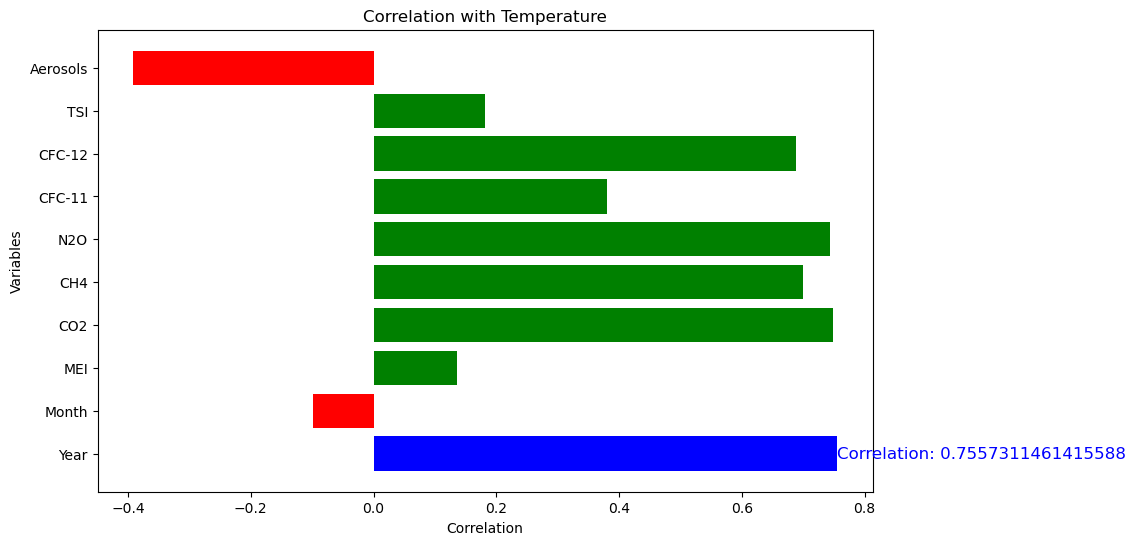

In [78]:
plt.figure(figsize=(10, 6))
plt.barh(variables, correlations, color=['green' if corr > 0 else 'red' for corr in correlations])
 
for item in MAX_col_name:
    plt.barh(item[0], item[1], color='blue')
    plt.text(item[1], item[0], f"Correlation: {MAX_col_corr}", va='center', fontsize=12, color='blue')

plt.xlabel("Correlation")
plt.ylabel("Variables")
plt.title("Correlation with Temperature")
plt.show()


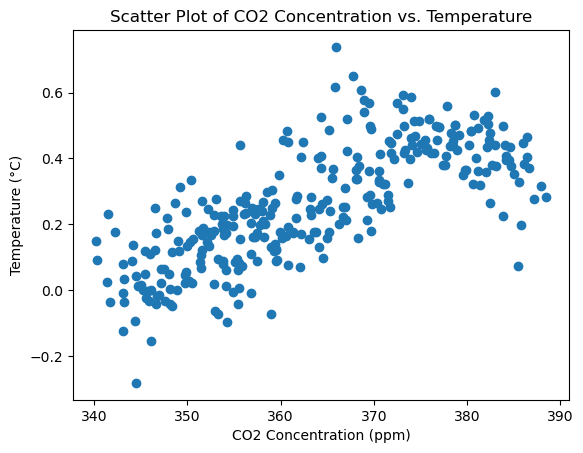

In [83]:
plt.scatter(dataset['CO2'], dataset['Temp'])
plt.xlabel('CO2 Concentration (ppm)')
plt.ylabel('Temperature (°C)')
plt.title('Scatter Plot of CO2 Concentration vs. Temperature')
plt.grid(True)
plt.show()